In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#Load the dataset
df = pd.read_csv('SampleData-Mobitel.csv')
df.head(4)

,id,package,product_desc,deducted_amt,event_time_stamp,connection_age,gender,age,dateval
0,52671547813691168,WAKEUP,Wake_up_call,1.23,2020-05-12 10:14:57,3768,0,37,2020-05-12
1,55993477747811320,CRBT_CNT,crbt_cnt_ren_Daily,3.68,2020-05-12 04:52:43,2755,0,36,2020-05-12
2,55993477747811320,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:42:44,2755,0,36,2020-05-12
3,52671565671173152,CRBT_SRV,crbt_srv_ren_Daily,2.45,2020-05-12 03:44:09,3764,1,57,2020-05-12


In [20]:
#Get the number of rows and number of columns
df.shape

(10000, 9)

In [35]:
#Create a list of important columns for the recommendation engine
columns = ['id','package','age','gender','deducted_amt']

In [60]:
df[columns].head(5)

,id,package,age,gender,deducted_amt
0,52671547813691168,WAKEUP,37,0,1.23
1,55993477747811320,CRBT_CNT,36,0,3.68
2,55993477747811320,CRBT_SRV,36,0,2.45
3,52671565671173152,CRBT_SRV,57,1,2.45
4,55993499054455256,B2W,53,1,6.13


In [37]:
#Check for any missing values in the important columns
df[columns].isnull().values.any()

False

In [25]:
# def get_important_features(data):
#     important_features = []
#     for i in range(0, data.shape[0]):
#         important_features.append(data['age'][i] + ' ' + data['gender'][i] + ' ' + data['deducted_amt'][i])
#     return important_features   

# df['important_features'] = get_important_features(df)

In [38]:
#Average age of each package
df.groupby('package')['age'].mean().head()

package
AOZM    48.571429
APIG    47.892989
ASTV    41.545455
AWDS    36.631579
B2W     42.501577
Name: age, dtype: float64

In [39]:
#Sort the mean values of age
df.groupby('package')['age'].mean().sort_values(ascending=False).head()

package
PLPL    69.000000
SMMD    58.500000
LOT     56.333333
STYO    52.666667
PASA    52.636364
Name: age, dtype: float64

In [40]:
#Total number of ages(users) for a package
df.groupby('package')['age'].count().sort_values(ascending=False).head()

package
CRBT_CNT    2313
CRBT_SRV    2181
MZIP         612
CLT          476
MHUNG        357
Name: age, dtype: int64

In [70]:
# plot a histogram for the number of ages/users represented by the "age_counts" column
age_mean_count = pd.DataFrame(df.groupby('package')['age'].mean())
age_mean_count['age_counts'] = pd.DataFrame(df.groupby('package')['age'].count())
age_mean_count.head(25)

,age,age_counts
package,,
AOZM,48.571429,7
APIG,47.892989,271
ASTV,41.545455,11
AWDS,36.631579,19
B2W,42.501577,317
BCENG,47.600000,10
BCVA,44.142857,7
CBC,33.451613,31
CEYH,42.000000,1


<AxesSubplot:>

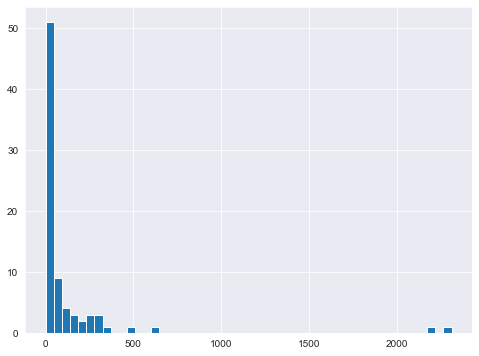

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))


plt.rcParams['patch.force_edgecolor'] = True
age_mean_count['age_counts'].hist(bins=50)

<AxesSubplot:>

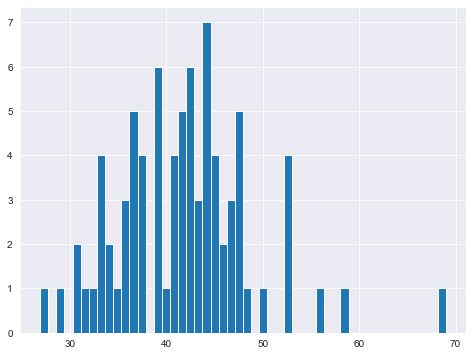

In [51]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
age_mean_count['age'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

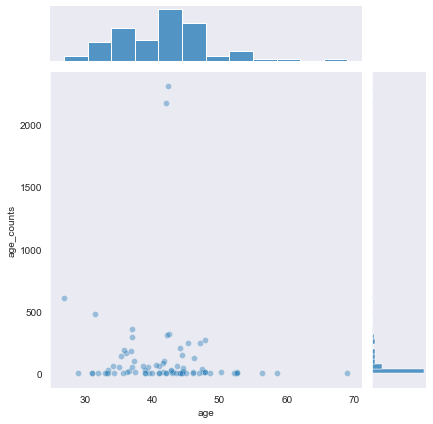

In [52]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='age', y='age_counts', data=age_mean_count, alpha=0.4)

In [62]:
user_package_age = df.pivot_table(index='package', columns='age', values='gender')
user_package_age.head(10)

age,-5969,16,17,18,19,20,21,22,23,24,...,84,85,86,89,90,91,92,99,100,120
package,,,,,,,,,,,,,,,,,,,,,
AOZM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APIG,NaN,NaN,NaN,1.0,NaN,1.000000,NaN,0.00,1.0,0.75,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B2W,NaN,NaN,NaN,1.0,0.666667,0.666667,NaN,1.00,1.0,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBC,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,1.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEYH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Total number of users for a package
df.groupby('package')['gender'].count().sort_values(ascending=False).head()

package
CRBT_CNT    2313
CRBT_SRV    2181
MZIP         612
CLT          476
MHUNG        357
Name: gender, dtype: int64

In [64]:
# plot a histogram for the number of gender/users represented by the "gender_counts" column
gender_mean_count = pd.DataFrame(df.groupby('package')['gender'].mean())
gender_mean_count['gender_counts'] = pd.DataFrame(df.groupby('package')['gender'].count())
gender_mean_count.head(10)

,gender,gender_counts
package,,
AOZM,0.714286,7
APIG,0.708487,271
ASTV,0.636364,11
AWDS,0.684211,19
B2W,0.649842,317
BCENG,0.900000,10
BCVA,0.714286,7
CBC,0.580645,31
CEYH,1.000000,1


<AxesSubplot:>

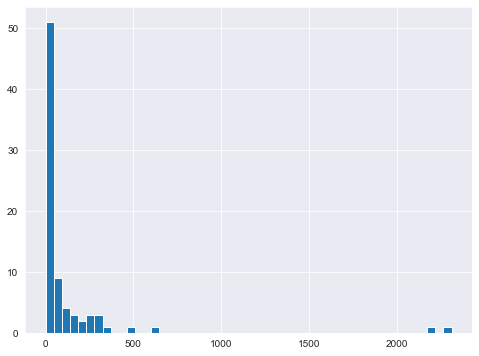

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
gender_mean_count['gender_counts'].hist(bins=50)

In [ ]:
gender1, gender0 = df[df]

In [43]:
#Average deducted amount of each package
df.groupby('package')['deducted_amt'].mean().head()

package
AOZM     1.530000
APIG     3.882915
ASTV     2.450000
AWDS    11.020000
B2W      5.631798
Name: deducted_amt, dtype: float64

In [44]:
#Sort the mean values of deducted amounts
df.groupby('package')['deducted_amt'].mean().sort_values(ascending=False).head()

package
ECH        2625.000000
CBC         148.203226
GTNB         61.712000
DUPAK        51.132800
MPLEXTV      42.815410
Name: deducted_amt, dtype: float64

In [45]:
# Total number of (deducted amounts)users for a package
df.groupby('package')['deducted_amt'].count().sort_values(ascending=False).head()

package
CRBT_CNT    2313
CRBT_SRV    2181
MZIP         612
CLT          476
MHUNG        357
Name: deducted_amt, dtype: int64